# MODEL 6 
### Contains only correct fixed-before-conditional trials without intervening BLs
### Combines A & C trials into single regressor
### Accounts for last three noisy volumes in Lvl 1 analysis (FSL ROI -- ExtractROI)

## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Putamen (FS labels: putamen [12, 51])

In [6]:
import os
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(sorted(mask_filenames_glob))

    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/model6/' 
                          + SID + '/fixedfx/cope_*')
    cope_files.append(subjcopes_glob)
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

In [7]:
print '0. left dlPFC'
print(mask_filenames[0][0]) #lh-dmPFC
print '1. left hippocampus'
print(mask_filenames[0][1]) #lh-HPC
print '2. left mPFC-FS-3'
print(mask_filenames[0][2]) #lh-mPFC-FS-3
print '3. left mPFC-FS'
print(mask_filenames[0][3]) #lh-mPFC-FS
print '4. left mPFC-Lausanne'
print(mask_filenames[0][4]) #lh-mPFC-L
print '5. left motor'
print(mask_filenames[0][5]) #lh-motor
print '6. left caudate'
print(mask_filenames[0][6]) #lh-caudate
print '7. right caudate'
print(mask_filenames[0][7]) #rh-caudate
print '8. right dmPFC'
print(mask_filenames[0][8]) #rh-dmPFC
print '9. right hippocampus'
print(mask_filenames[0][9]) #rh-HPC
print '10. right mPFC-FS-3'
print(mask_filenames[0][10]) #rh-mPFC-FS-3
print '11. right mPFC-fs'
print(mask_filenames[0][11]) #rh-mPFC-FS
print '12. right mPFC-Lausanne'
print(mask_filenames[0][12]) #rh-mPFC-L
print '13. right motor'
print(mask_filenames[0][13]) #rh-motor
print '14. left putamen'
print(mask_filenames[0][14]) #lh-putamen
print '15. right putamen'
print(mask_filenames[0][15]) #rh-putamen

#print""
#print '-----'
#print ""

#print 'all_before_B_corr'
#print(cope_files[0][0]) #A_before_B_corr
#print 'all_before_B_incorr'
#print(cope_files[0][1]) #A_before_B_incorr

#for i in cope_files:
#    print(len(i))


0. left dlPFC
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-dmPFC_warped.nii.gz
1. left hippocampus
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-hippocampus_warped.nii.gz
2. left mPFC-FS-3
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-mPFC_fs-3reg_warped.nii.gz
3. left mPFC-FS
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-mPFC_fs_warped.nii.gz
4. left mPFC-Lausanne
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-mPFC_lausanne_warped.nii.gz
5. left motor
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-motor_warped.nii.gz
6. left caudate
/home/data/madlab/data/mri/wm

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [8]:
import nibabel as nb
import pandas as pd
import numpy as np


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lhhp_fixed_corr_before_cond_corr':[], 'rhhp_fixed_corr_before_cond_corr':[], 
            'lhhp_fixed_corr_before_cond_incorr':[], 'rhhp_fixed_corr_before_cond_incorr':[],
            
            'lhcaudate_fixed_corr_before_cond_corr':[], 'rhcaudate_fixed_corr_before_cond_corr':[], 
            'lhcaudate_fixed_corr_before_cond_incorr':[], 'rhcaudate_fixed_corr_before_cond_incorr':[],
            
            'lhputamen_fixed_corr_before_cond_corr':[], 'rhputamen_fixed_corr_before_cond_corr':[], 
            'lhputamen_fixed_corr_before_cond_incorr':[], 'rhputamen_fixed_corr_before_cond_incorr':[],
           
            'lhmPFC_fixed_corr_before_cond_corr':[], 'rhmPFC_fixed_corr_before_cond_corr':[], 
            'lhmPFC_fixed_corr_before_cond_incorr':[], 'rhmPFC_fixed_corr_before_cond_incorr':[]}


# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][1])
    rh_hp_img = nb.load(mask_filenames[i][9])
    #lh_mPFC_img = nb.load(mask_filenames[i][2]) #FreeSurfer-3
    #rh_mPFC_img = nb.load(mask_filenames[i][10]) #FreeSurfer-3
    lh_mPFC_img = nb.load(mask_filenames[i][3]) #FreeSurfer-2
    rh_mPFC_img = nb.load(mask_filenames[i][11]) #FreeSurfer-2
    lh_caudate_img = nb.load(mask_filenames[i][6])
    rh_caudate_img = nb.load(mask_filenames[i][7])
    lh_putamen_img = nb.load(mask_filenames[i][14])
    rh_putamen_img = nb.load(mask_filenames[i][15])

    
    #Load copes for individual trial types
    fixed_corr_before_cond_corr_img = nb.load(cope_files[i][1])
    fixed_corr_before_cond_incorr_img = nb.load(cope_files[i][2])
    
    
    ########################
    ### Left Hippocampus ###
    ########################
    
    # fixed_corr_before_cond_corr
    lh_hp_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_fixed_corr_before_cond_corr'].append(np.mean(lh_hp_fixed_corr_before_cond_corr_data))
    
    # fixed_corr_before_cond_incorr
    lh_hp_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_fixed_corr_before_cond_incorr'].append(np.mean(lh_hp_fixed_corr_before_cond_incorr_data))
      
    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # fixed_corr_before_cond_corr
    rh_hp_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_fixed_corr_before_cond_corr'].append(np.mean(rh_hp_fixed_corr_before_cond_corr_data))

    # fixed_corr_before_cond_incorr
    rh_hp_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_fixed_corr_before_cond_incorr'].append(np.mean(rh_hp_fixed_corr_before_cond_incorr_data))

    
    ####################
    ### Left Caudate ###
    ####################
    
    # fixed_corr_before_cond_corr
    lh_caudate_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_fixed_corr_before_cond_corr'].append(np.mean(lh_caudate_fixed_corr_before_cond_corr_data))
    
    # fixed_corr_before_cond_incorr
    lh_caudate_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_fixed_corr_before_cond_incorr'].append(np.mean(lh_caudate_fixed_corr_before_cond_incorr_data))
         
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # fixed_corr_before_cond_corr
    rh_caudate_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_fixed_corr_before_cond_corr'].append(np.mean(rh_caudate_fixed_corr_before_cond_corr_data))

    # fixed_corr_before_cond_incorr
    rh_caudate_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_fixed_corr_before_cond_incorr'].append(np.mean(rh_caudate_fixed_corr_before_cond_incorr_data))
    
    
    ####################
    ### Left Putamen ###
    ####################
    
    # fixed_corr_before_cond_corr
    lh_putamen_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_fixed_corr_before_cond_corr'].append(np.mean(lh_putamen_fixed_corr_before_cond_corr_data))
    
    # fixed_corr_before_cond_incorr
    lh_putamen_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_fixed_corr_before_cond_incorr'].append(np.mean(lh_putamen_fixed_corr_before_cond_incorr_data))
          
    
    #####################
    ### Right Putamen ###
    #####################
    
    # fixed_corr_before_cond_corr
    rh_putamen_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_fixed_corr_before_cond_corr'].append(np.mean(rh_putamen_fixed_corr_before_cond_corr_data))

    # fixed_corr_before_cond_incorr
    rh_putamen_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_fixed_corr_before_cond_incorr'].append(np.mean(rh_putamen_fixed_corr_before_cond_incorr_data))

    
    ####################
    #### Left mPFC ####
    ####################
    
    # fixed_corr_before_cond_corr
    lh_mPFC_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lhmPFC_fixed_corr_before_cond_corr'].append(np.mean(lh_mPFC_fixed_corr_before_cond_corr_data))
    
    # fixed_corr_before_cond_incorr
    lh_mPFC_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lhmPFC_fixed_corr_before_cond_incorr'].append(np.mean(lh_mPFC_fixed_corr_before_cond_incorr_data))
          
    
    #####################
    #### Right mPFC ####
    #####################
    
    # fixed_corr_before_cond_corr
    rh_mPFC_fixed_corr_before_cond_corr_data = fixed_corr_before_cond_corr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rhmPFC_fixed_corr_before_cond_corr'].append(np.mean(rh_mPFC_fixed_corr_before_cond_corr_data))

    # fixed_corr_before_cond_incorr
    rh_mPFC_fixed_corr_before_cond_incorr_data = fixed_corr_before_cond_incorr_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rhmPFC_fixed_corr_before_cond_incorr'].append(np.mean(rh_mPFC_fixed_corr_before_cond_incorr_data))
    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average

In [9]:
#Hippocampus average for each trial type
all_data_df['hp_fixed_corr_before_cond_corr'] = (all_data_df['lhhp_fixed_corr_before_cond_corr'] + 
                                                 all_data_df['rhhp_fixed_corr_before_cond_corr'])/2.
all_data_df['hp_fixed_corr_before_cond_incorr'] = (all_data_df['lhhp_fixed_corr_before_cond_incorr'] + 
                                                   all_data_df['rhhp_fixed_corr_before_cond_incorr'])/2.



#Caudate average for each trial type
all_data_df['caudate_fixed_corr_before_cond_corr'] = (all_data_df['lhcaudate_fixed_corr_before_cond_corr'] + 
                                                      all_data_df['rhcaudate_fixed_corr_before_cond_corr'])/2.
all_data_df['caudate_fixed_corr_before_cond_incorr'] = (all_data_df['lhcaudate_fixed_corr_before_cond_incorr'] + 
                                                        all_data_df['rhcaudate_fixed_corr_before_cond_incorr'])/2.



#Putamen average for each trial type
all_data_df['putamen_fixed_corr_before_cond_corr'] = (all_data_df['lhputamen_fixed_corr_before_cond_corr'] + 
                                                      all_data_df['rhputamen_fixed_corr_before_cond_corr'])/2.
all_data_df['putamen_fixed_corr_before_cond_incorr'] = (all_data_df['lhputamen_fixed_corr_before_cond_incorr'] + 
                                                        all_data_df['rhputamen_fixed_corr_before_cond_incorr'])/2.



#mPFC average for each trial type
all_data_df['mPFC_fixed_corr_before_cond_corr'] = (all_data_df['lhmPFC_fixed_corr_before_cond_corr'] + 
                                                      all_data_df['rhmPFC_fixed_corr_before_cond_corr'])/2.
all_data_df['mPFC_fixed_corr_before_cond_incorr'] = (all_data_df['lhmPFC_fixed_corr_before_cond_incorr'] + 
                                                        all_data_df['rhmPFC_fixed_corr_before_cond_incorr'])/2.

## Hippocampus

fixed_corr_before_cond_corr mean:  -1.12801035158
fixed_corr_before_cond_incorr:  -2.58068096824

T-test: Hippocampus fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr
(4.2132397409099394, 0.00047087822525260079)
Cohen's d =  0.984028760328


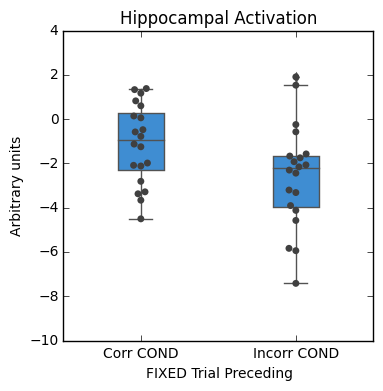

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
from scipy import stats
from math import sqrt

print 'fixed_corr_before_cond_corr mean: ', all_data_df['hp_fixed_corr_before_cond_corr'].mean()
print 'fixed_corr_before_cond_incorr: ', all_data_df['hp_fixed_corr_before_cond_incorr'].mean()
print ""
print 'T-test: Hippocampus fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr'
print stats.ttest_rel(all_data_df['hp_fixed_corr_before_cond_corr'], all_data_df['hp_fixed_corr_before_cond_incorr'])[:]

cohens_d = ((np.average(all_data_df['hp_fixed_corr_before_cond_corr']) 
             - np.average(all_data_df['hp_fixed_corr_before_cond_incorr'])) 
            / (sqrt((np.std(all_data_df['hp_fixed_corr_before_cond_corr'], ddof = 1)) 
            ** 2 + np.std(all_data_df['hp_fixed_corr_before_cond_incorr'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Corr COND', 'Incorr COND']

hp_allsubjs = [all_data_df['hp_fixed_corr_before_cond_corr'], 
               all_data_df['hp_fixed_corr_before_cond_incorr']]
ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("FIXED Trial Preceding")
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.savefig("/home/arenf001/model6.jpg", dpi = 1080)
plt.show()

## mPFC

fixed_corr_before_cond_corr mean:  -1.24848753363
fixed_corr_before_cond_incorr:  -2.2288553589

T-test: mPFC fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr
(1.9698049241864064, 0.063614778499126431)
Cohen's d =  0.437287383375


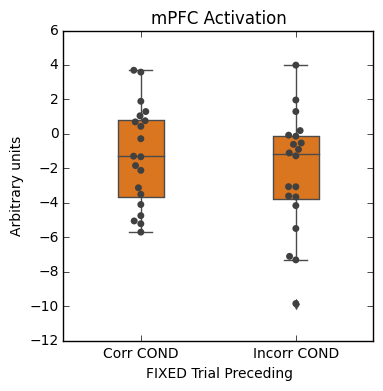

In [21]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
from scipy import stats
from math import sqrt

print 'fixed_corr_before_cond_corr mean: ', all_data_df['mPFC_fixed_corr_before_cond_corr'].mean()
print 'fixed_corr_before_cond_incorr: ', all_data_df['mPFC_fixed_corr_before_cond_incorr'].mean()
print ""
print 'T-test: mPFC fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr'
print stats.ttest_rel(all_data_df['mPFC_fixed_corr_before_cond_corr'], all_data_df['mPFC_fixed_corr_before_cond_incorr'])[:]

cohens_d = ((np.average(all_data_df['mPFC_fixed_corr_before_cond_corr']) 
             - np.average(all_data_df['mPFC_fixed_corr_before_cond_incorr'])) 
            / (sqrt((np.std(all_data_df['mPFC_fixed_corr_before_cond_corr'], ddof = 1)) 
            ** 2 + np.std(all_data_df['mPFC_fixed_corr_before_cond_incorr'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Corr COND', 'Incorr COND']

mPFC_allsubjs = [all_data_df['mPFC_fixed_corr_before_cond_corr'], 
               all_data_df['mPFC_fixed_corr_before_cond_incorr']]
ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = mPFC_allsubjs, color = "#f97401", width = 0.3)
ax2 = sns.swarmplot(data = mPFC_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("FIXED Trial Preceding")
ax.set_ylabel("Arbitrary units")
ax.set_title("mPFC Activation")
plt.savefig("/home/arenf001/model6_mPFC.jpg", dpi = 1080)
plt.show()

## Caudate

fixed_corr_before_cond_corr
0.792075610068
fixed_corr_before_cond_incorr
0.799351135222
T-test: Caudate fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr
Ttest_relResult(statistic=-0.011218373100768583, pvalue=0.99116617928623829)


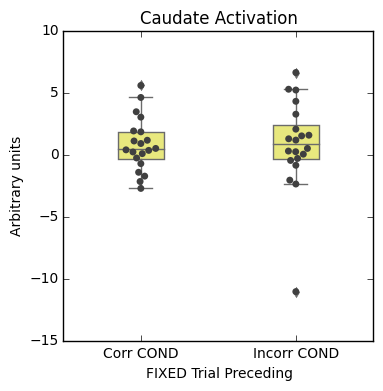

In [13]:
print 'fixed_corr_before_cond_corr'
print all_data_df['caudate_fixed_corr_before_cond_corr'].mean()
print 'fixed_corr_before_cond_incorr'
print all_data_df['caudate_fixed_corr_before_cond_incorr'].mean()


print 'T-test: Caudate fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr'
print stats.ttest_rel(all_data_df['caudate_fixed_corr_before_cond_corr'], 
                      all_data_df['caudate_fixed_corr_before_cond_incorr'])

N = 2
conditions = ['Corr COND', 'Incorr COND']

caudate_allsubjs = [all_data_df['caudate_fixed_corr_before_cond_corr'], 
               all_data_df['caudate_fixed_corr_before_cond_incorr']]
ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = caudate_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caudate_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("FIXED Trial Preceding")
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
#plt.savefig("/home/arenf001/model6-2.jpg", dpi = 1080)
plt.show()

## Putamen

fixed_corr_before_cond_corr
0.808207439631
fixed_corr_before_cond_incorr
-0.392488810793
T-test: Putamen fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr
Ttest_relResult(statistic=2.5467352392002724, pvalue=0.019694942594097604)
Cohen's d =  0.64848798732


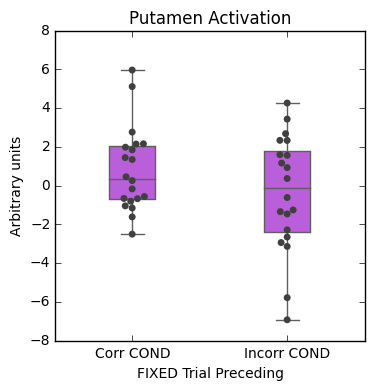

In [19]:
print 'fixed_corr_before_cond_corr'
print all_data_df['putamen_fixed_corr_before_cond_corr'].mean()
print 'fixed_corr_before_cond_incorr'
print all_data_df['putamen_fixed_corr_before_cond_incorr'].mean()


print 'T-test: Putamen fixed_corr_before_cond_corr vs. fixed_corr_before_cond_incorr'
print stats.ttest_rel(all_data_df['putamen_fixed_corr_before_cond_corr'], 
                      all_data_df['putamen_fixed_corr_before_cond_incorr'])
cohens_d = ((np.average(all_data_df['putamen_fixed_corr_before_cond_corr']) 
             - np.average(all_data_df['putamen_fixed_corr_before_cond_incorr'])) 
            / (sqrt((np.std(all_data_df['putamen_fixed_corr_before_cond_corr'], ddof = 1)) 
            ** 2 + np.std(all_data_df['putamen_fixed_corr_before_cond_incorr'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Corr COND', 'Incorr COND']

putamen_allsubjs = [all_data_df['putamen_fixed_corr_before_cond_corr'], 
               all_data_df['putamen_fixed_corr_before_cond_incorr']]
ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = putamen_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = putamen_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("FIXED Trial Preceding")
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
#plt.savefig("/home/arenf001/model6-3.jpg", dpi = 1080)
plt.show()